In [2]:
import numpy as np
import pandas as pd
from pathlib import Path

In [3]:
# Read in the CSV file
pthmerged = Path('../data','merged_data.csv')
print(pthmerged)

..\data\merged_data.csv


In [8]:


# Read in the CSV file
pthmerged = Path('data/','merged_data.csv')
dfmerged  = pd.read_csv(pthmerged)

# Rename the dataframe
dfmerged = dfmerged.rename({'LSLs per 100k people ':'LSLs per 100k people'})

# Transform and replace theft data with a logarithm of itself
dfmerged['theft_log'] = np.log(dfmerged['theft'])

# Transform and replace vehicle theft data with a logarithm of itself
dfmerged['vehicle theft_log']=np.log(dfmerged['vehicle theft'])

# Transform and replace the data containing the number of Lead Service Lines / 100k people
dfmerged['LSLs per 100k people_log']=np.log(dfmerged['LSLs per 100k people'])

#
# mean_lsl=dfmerged['LSLs per 100k people'].mean()
# max_lsl=dfmerged['LSLs per 100k people'].max()
# min_lsl=dfmerged['LSLs per 100k people'].min()
# diff_lsl=max_lsl-min_lsl
# print(mean_lsl)
# dfmerged['LSLs per 100k people_mn']=(dfmerged['LSLs per 100k people']-mean_lsl)/diff_lsl
# dfmerged['LSLs per 100k people_minmax']=(dfmerged['LSLs per 100k people']-min_lsl)/diff_lsl
dfmerged.columns
# dfmerged

Index(['State', 'LSLs per 100k people', 'violent crime', 'murder', 'rape2',
       'rape3', 'robbery', 'agg assault', 'ppty crime', 'burglary', 'theft',
       'vehicle theft', 'theft_log', 'vehicle theft_log',
       'LSLs per 100k people_log'],
      dtype='object')

In [9]:
try:
    dfmerged.corr()
catch:


ValueError: could not convert string to float: 'Alabama'

In [ ]:
# dfmerged.info()
dfmerged.columns

Index(['State', 'LSLs per 100k people', 'violent crime', 'murder', 'rape2',
       'rape3', 'robbery', 'agg assault', 'ppty crime', 'burglary', 'theft',
       'vehicle theft', 'theft_log', 'vehicle theft_log',
       'LSLs per 100k people_log'],
      dtype='object')

In [ ]:
dfmerged.plot.scatter('LSLs per 100k people','violent crime')
dfmerged.savefig('my_plot.png')

NameError: name 'dfmerged' is not defined

<Axes: xlabel='LSLs per 100k people_log', ylabel='vehicle theft'>

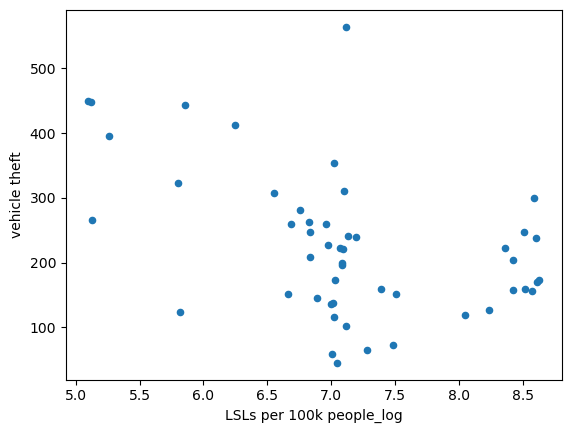

In [ ]:
dfmerged.plot.scatter('LSLs per 100k people_log','vehicle theft')

In [ ]:
# what state is furthest right and highest?
dfmerged['lsls + violent crime']=dfmerged['LSLs per 100k people']*dfmerged['violent crime']
# dfmerged.head()
# dfmerged=
# dfmerged.columns
dfmerged=dfmerged.sort_values(by='lsls + violent crime',ascending=False)
dfmerged.head()

,State,LSLs per 100k people,violent crime,murder,rape2,rape3,robbery,agg assault,ppty crime,burglary,theft,vehicle theft,theft_log,vehicle theft_log,LSLs per 100k people_log,lsls + violent crime
24,Missouri,5362,519.4,8.8,41.9,30.9,107.8,360.8,2799.1,520.4,1978.4,300.3,7.590044,5.704782,8.587092,2785022.8
12,Illinois,5302,436.3,8.2,38.3,28.4,139.3,250.5,2049.0,374.9,1518.6,155.5,7.325544,5.046646,8.575839,2313262.6
21,Michigan,4565,459.0,6.0,71.8,51.5,71.7,309.5,1909.9,398.5,1308.1,203.2,7.176331,5.314191,8.426174,2095335.0
15,Kansas,5446,380.4,3.8,45.1,33.4,57.5,274.0,2695.5,494.1,1962.9,238.6,7.582178,5.474789,8.602637,2071658.4
13,Indiana,4274,404.7,6.6,37.7,27.9,110.5,249.9,2589.4,514.0,1853.3,222.1,7.524723,5.403128,8.360305,1729687.8


In [ ]:
#so...Missouri appears to have the highest coorelation of violent crime and lsls!
#can we find more information at a more granular level on Missouri?